## 七月在线机器学习实训营三期第四周(数据可视化及拟合)考试
#### 考试说明:
- 起止时间：请同学在2018年3月2日至3月4日期间完成，最晚提交时间本周日（3月4日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学<font color=red><b>拷贝</b></font>该试卷至自己姓名的目录后，将文件更名为同学姓名拼音-exam4后，进行作答。例如wangwei-exam4
- 提交格式：请同学新建自己姓名全拼的文件夹，将该试卷，zip文件等相关考试文件，放置此目录下。将该目录<b>移动</b>至/0.Teacher/Exam/4/目录下
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:<u>沈民章</u>  
- 批改人： David
- 最终得分:87

<center><h1>####答卷开始####</h1></center>
<hr>

## 问答题(共5题，每题4分，共计20分)
Note: 12

### 1.谈谈您对数据可视，以及其对数据分析，机器学习的意义的理解

数据分析是指用适当的统计分析方法对收集来的大量数据进行分析，提取有用信息和形成结论而对数据加以详细研究和概括总结的过程。这一过程也是质量管理体系的支持过程。在实用中，数据分析可帮助人们作出判断，以便采取适当行动。
而数据可视化,指的是,将数据分析后的数据变成图表,方便人们通过图表来了解数据的意义。


### 2.某评测网站对市场上某品牌充电宝随机抽取30款测得其使用寿命数据，请问哪些可视化方案适宜呈现该结果？这些方案透露出了哪些含义

***您的答案

### 3.	一组数据的分布特征可以从哪几个方面进行描述？

1.分布的集中趋势，反映各数据向其中心值靠拢或聚集的程度； 
2.分布的离散程度，反映各数据远离其中心值的趋势； 
3.分布的形状，反映数据分布的偏态和峰态。

### 4.（接上题）如何从可视化的角度解读一组数据的分布特征？(代码演示有额外加分)

***您的答案

### 5.简要谈谈您对seaborn库的理解，以及有哪些较高级的用法。(代码演示有额外加分)

第一点,相比较matplotlib的代码,seaborn的代码比较短,比如:

In [79]:
data = sns.load_dataset('flights')
data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


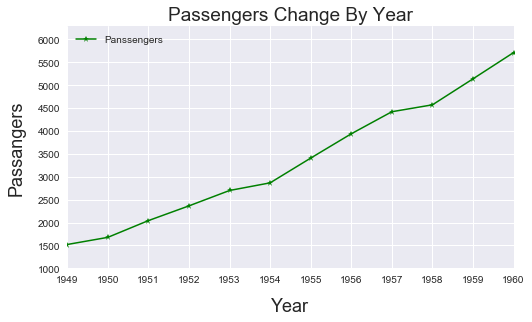

In [80]:
#matplotlib代码
groupby_year_data = data.groupby('year').agg({'passengers': sum}).reset_index()
plt.rcParams["figure.figsize"] = (8,4.45)
x = groupby_year_data['year'].values
y = groupby_year_data['passengers'].values
plt.plot(x, y ,color='green', linewidth=1.5, linestyle='-', marker='*', label='Panssengers')
ax = plt.subplot(111)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max()*1.1)
plt.xticks(x)
plt.yticks(np.arange(y.min()//1000*1000,y.max()//1000*1000+1001, 500))
plt.title('Passengers Change By Year', fontsize=19)
plt.xlabel('Year', fontsize=18, labelpad=12.5)
plt.ylabel('Passangers', fontsize=18, labelpad=12.5)
plt.legend(loc='upper left')    
plt.grid(True)    
plt.show()

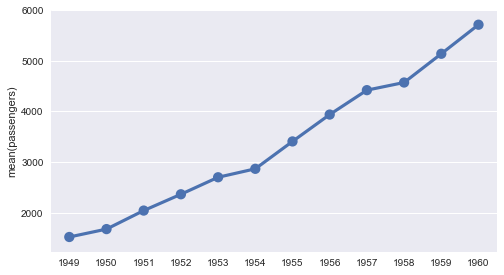

In [81]:
#seaborn代码
sns.pointplot(x = data.groupby(by = 'year').all().index.values,
              y = data.groupby(by = 'year')['passengers'].sum())

第二点,matplotlib画直方图和密度图需要分两张,而seaborn可以画一起,比如:

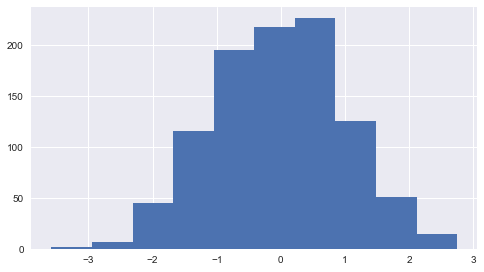

In [84]:
#matplotlib代码
s1 = Series(np.random.randn(1000))
plt.hist(s1)
plt.show()

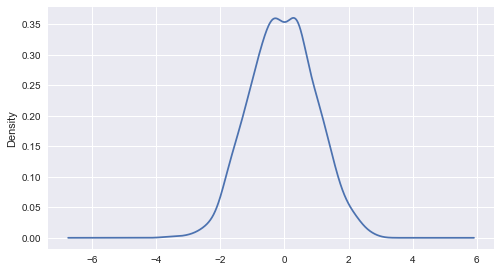

In [85]:
s1.plot(kind='kde')
plt.show()

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


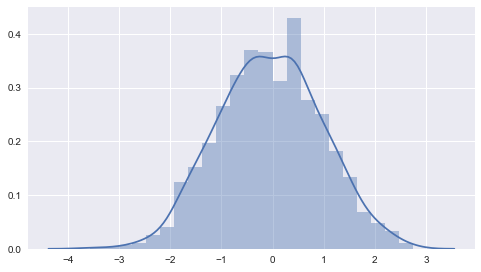

In [86]:
#seaborn代码
sns.distplot(s1, hist=True, kde=True)
plt.show()

第三点,seaborn可以加载在线的数据,第一点中已经表达了

## 实战题(共四题，每题20分)
#### (注意:题目均要求使用seaborn库进行)

- Note:
75

### 1.航班乘客变化分析

- 载入相应绘图库及航班乘客数据（flights）

In [29]:
import datetime
import matplotlib.dates as mpd
import matplotlib.finance as mpf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import time
from matplotlib import gridspec
from pandas import DataFrame
from pandas import Series

%matplotlib inline

In [3]:
data1 = sns.load_dataset('flights')
data1.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


- 分析年度乘客总量变化情况（折线图）

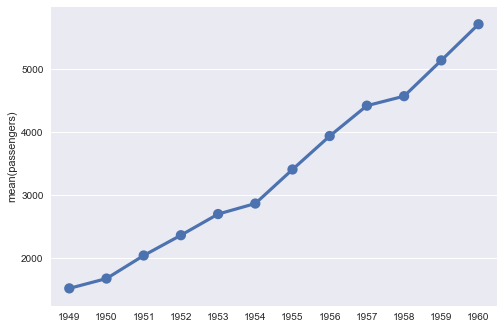

In [4]:
sns.pointplot(x = data1.groupby(by = 'year').all().index.values,
              y = data1.groupby(by = 'year')['passengers'].sum())


- 分析乘客在一年中各月份的分布（柱状图）

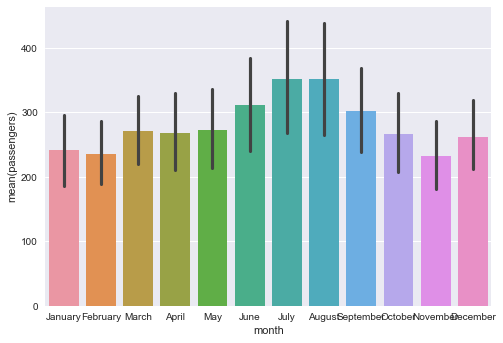

In [10]:
sns.barplot(x = 'month', y = 'passengers',data = data1)

### 2.鸢尾花花型尺寸分析

* 载入iris数据集
* 萼片（sepal）和花瓣（petal）的大小关系（散点图）
- 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）
* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）

In [14]:
data2 = sns.load_dataset('iris')
data2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


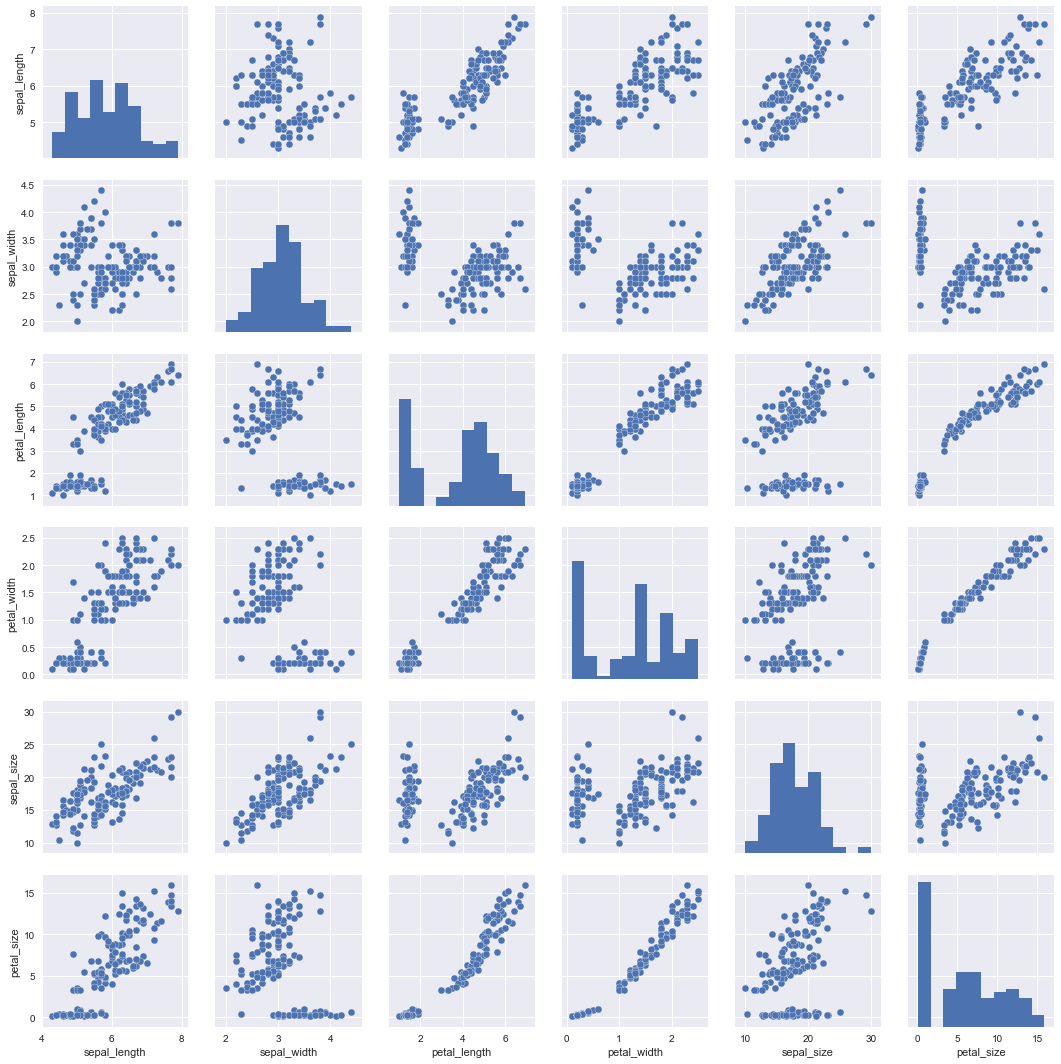

In [19]:
#萼片（sepal）和花瓣（petal）的大小关系（散点图）
sns.pairplot(data2)

- Note: 这样可视图如何解读呢？

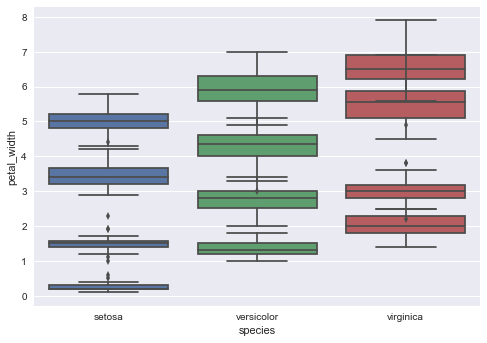

In [21]:
#不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）
sns.boxplot(x='species',y='sepal_length',data=data2)
sns.boxplot(x='species',y='sepal_width',,data=data2)
sns.boxplot(x='species',y='petal_length',data=data2)
sns.boxplot(x='species',y='petal_width',data=data2)

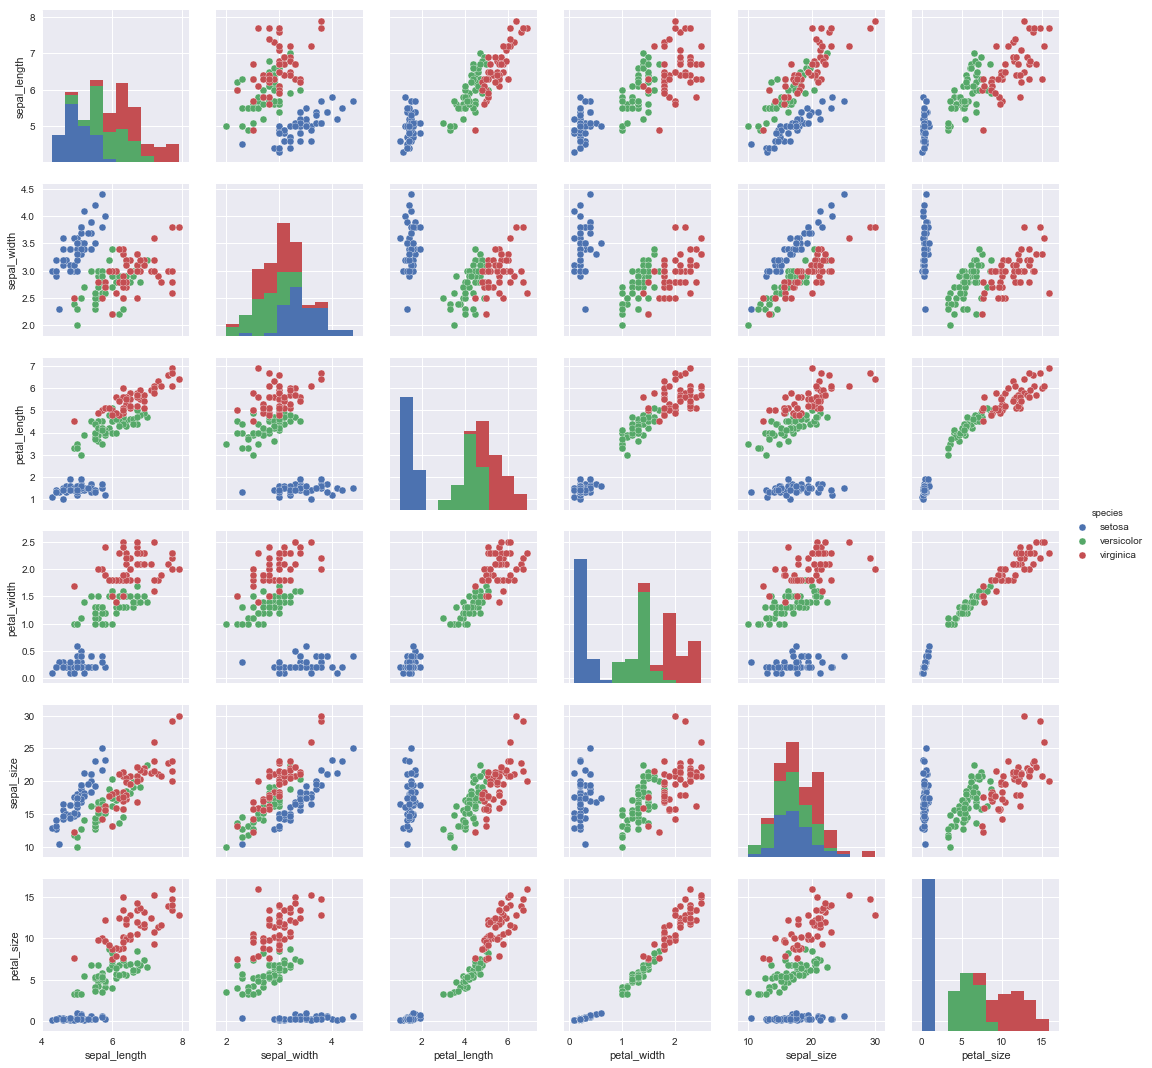

In [20]:
#不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
sns.pairplot(data2, hue='species')

### 3.餐厅小费情况分析
* 载入tips数据集
* 小费和总消费之间的关系（散点图）
* 男性顾客和女性顾客，谁更慷慨（分类箱式图）
* 抽烟与否是否会对小费金额产生影响（分类箱式图）
* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
* 就餐人数是否会对慷慨度产生影响（分类箱式图）
* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

In [22]:
data3 = sns.load_dataset('tips')
data3.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


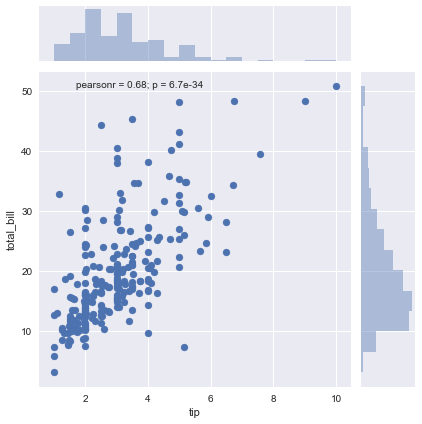

In [50]:
#小费和总消费之间的关系（散点图）
sns.jointplot(x='tip',y='total_bill',data=data3)

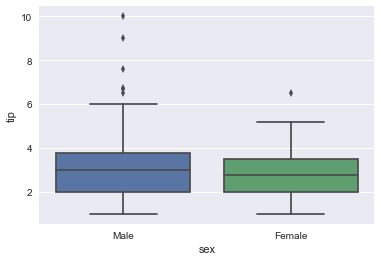

In [44]:
#男性顾客和女性顾客，谁更慷慨（分类箱式图）
sns.boxplot(x='sex',y='tip',data=data3)

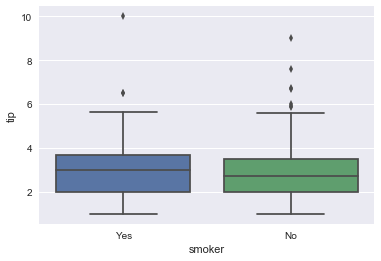

In [45]:
#抽烟与否是否会对小费金额产生影响（分类箱式图）
sns.boxplot(x='smoker',y='tip',data=data3)

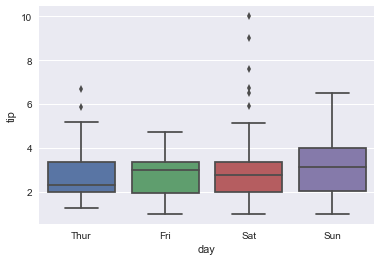

In [46]:
#工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
sns.boxplot(x='day',y='tip',data=data3)

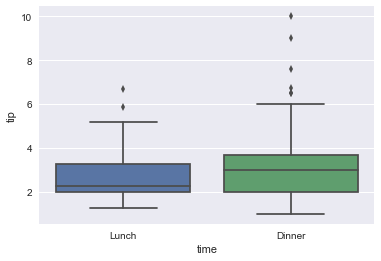

In [47]:
#午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
sns.boxplot(x='time',y='tip',data=data3)

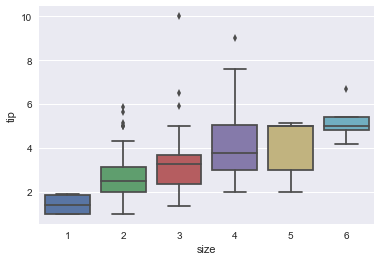

In [49]:
#就餐人数是否会对慷慨度产生影响（分类箱式图）
sns.boxplot(x='size',y='tip',data=data3)

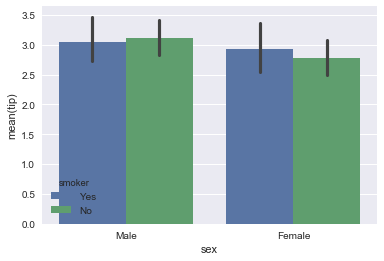

In [52]:
#性别+抽烟的组合因素对慷慨度的影响（分组柱状图）
sns.barplot(x='sex',y='tip',hue='smoker',data=data3)

### 4.泰坦尼克号海难幸存状况分析
* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
* 不同性别的幸存比例（堆积柱状图）
* 幸存和遇难乘客的票价分布（分类箱式图）
* 幸存和遇难乘客的年龄分布（分类箱式图）
* 不同上船港口的乘客仓位等级分布（分组柱状图）
* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
* 幸存和遇难乘客父母子女的数量分布（分类箱式图）
* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

In [54]:
data4 = sns.load_dataset('titanic')
data4.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


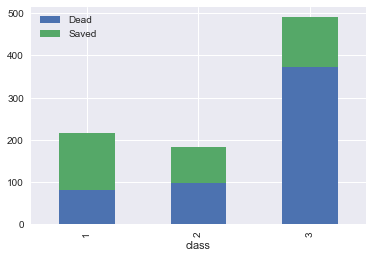

In [58]:
#不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
s_0 = data4.pclass[data4.alive == 'no'].value_counts()
s_1 = data4.pclass[data4.alive == 'yes'].value_counts()
df = pd.DataFrame({'Saved': s_1, 'Dead': s_0})
df.plot(kind='bar', stacked='True')
plt.xlabel('class')

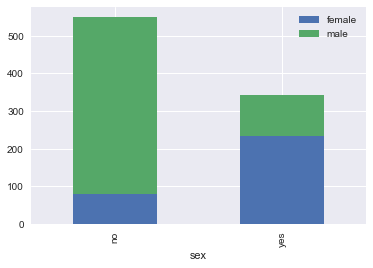

In [59]:
#不同性别的幸存比例（堆积柱状图）
s_male = data4.alive[data4.sex == 'male'].value_counts()
s_female = data4.alive[data4.sex == 'female'].value_counts()
df = pd.DataFrame({'male': s_male, 'female': s_female})
df.plot(kind='bar', stacked='True')
plt.xlabel('sex')

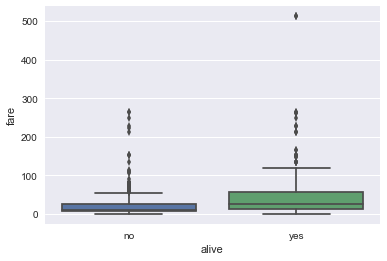

In [64]:
#幸存和遇难乘客的票价分布（分类箱式图）
sns.boxplot(x='alive',y='fare',data=data4)

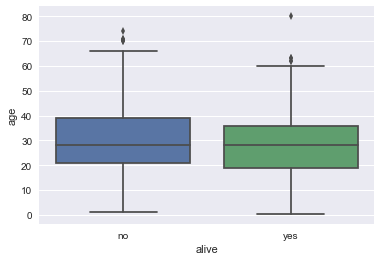

In [65]:
#幸存和遇难乘客的年龄分布（分类箱式图）
sns.boxplot(x='alive',y='age',data=data4)

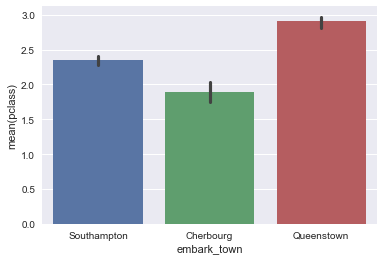

In [67]:
#不同上船港口的乘客仓位等级分布（分组柱状图）
sns.barplot(x='embark_town',y='pclass',data=data4)

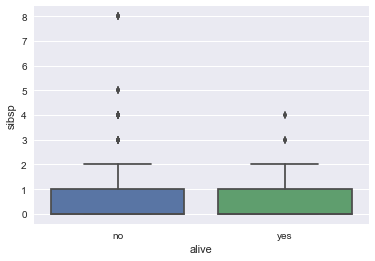

In [68]:
#幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
sns.boxplot(x='alive',y='sibsp',data=data4)

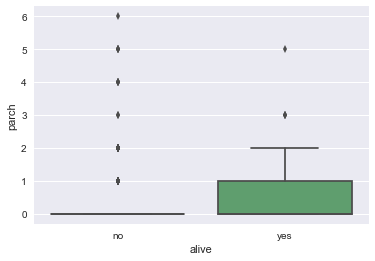

In [70]:
#幸存和遇难乘客父母子女的数量分布（分类箱式图）
sns.boxplot(x='alive',y='parch',data=data4)

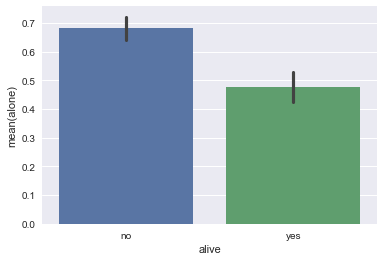

In [73]:
#单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）
sns.barplot(x='alive',y='alone',data=data4)

### 本阶段课程意见反馈题(10分送分项，非必答)
#### 请同学围绕以下两点进行回答：
- 自身总结：请您对您自己在本周课程的学习，收获，技能掌握等方面进行一次总结 ，也包括有哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。


- 课程反馈：请就知识点，进度，难易度，教学方式，考试方式及难易度等方面向我们反馈，督促我们进行更有效的改进。

<hr>
<center><h1>####答卷结束####</h1></center>